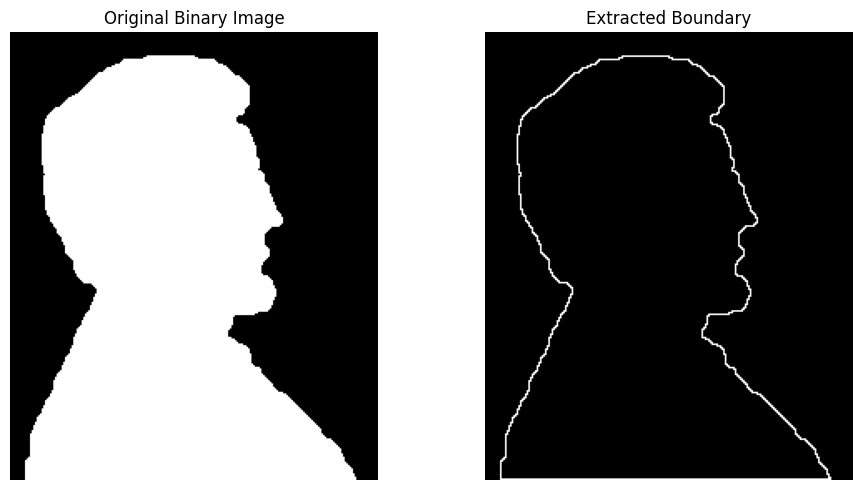

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def manual_erosion(binary_image, struct_element):
    """
    Perform erosion manually on a binary image using a given structuring element.
    """
    img_height, img_width = binary_image.shape
    kernel_height, kernel_width = struct_element.shape
    pad_h, pad_w = kernel_height // 2, kernel_width // 2

    # Create a padded version of the binary image
    padded_image = np.pad(binary_image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    eroded_image = np.zeros_like(binary_image)

    # Slide the structuring element over the image
    for i in range(img_height):
        for j in range(img_width):
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            if np.all(region[struct_element == 1] == 255):  # Only match where struct element is 1
                eroded_image[i, j] = 255
            else:
                eroded_image[i, j] = 0

    return eroded_image

def extract_boundary(binary_image, struct_element):
    """
    Extract the boundary of objects in a binary image using erosion.
    """
    # Perform erosion on the binary image
    eroded_image = manual_erosion(binary_image, struct_element)

    # Subtract the eroded image from the original image
    boundary_image = binary_image - eroded_image

    return boundary_image

def plot_results(original_image, boundary_image):
    """
    Plot the original image and the boundary-extracted image.
    """
    plt.figure(figsize=(10, 5))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Binary Image')
    plt.axis('off')

    # Boundary image
    plt.subplot(1, 2, 2)
    plt.imshow(boundary_image, cmap='gray')
    plt.title('Extracted Boundary')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Load a binary image from the provided path
image_path = "img2.tif"  # Replace with your image path
binary_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if binary_image is None:
    raise ValueError("Could not load the image. Please check the file path.")

# Threshold the image to ensure it's binary (0 or 255)
_, binary_image = cv2.threshold(binary_image, 127, 255, cv2.THRESH_BINARY)

# Define a structuring element (e.g., a 3x3 matrix)
structuring_element = np.array([[1, 1, 1],
                                 [1, 1, 1],
                                 [1, 1, 1]])

# Perform boundary extraction
boundary_image = extract_boundary(binary_image, structuring_element)

# Plot results
plot_results(binary_image, boundary_image)
